<a href="https://colab.research.google.com/github/cepdnaclk/e19-CO544-Online-Shoppers-Purchasing-Intention/blob/main/Code/Online_Shoppers_Purchasing_Intention_Statistic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import important libraries and insert the csv file

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/cepdnaclk/e19-CO544-Online-Shoppers-Purchasing-Intention/main/DataSets/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


#to check whether is there any missing values. if exists we need to fill those missing values.


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In our datasets there are no missing values.


#Target Variable


In [30]:

df['Revenue'].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

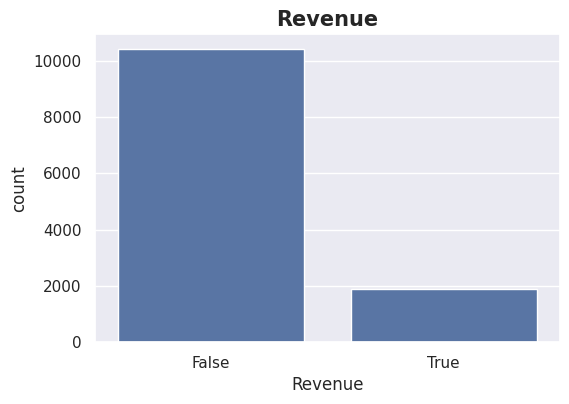

In [31]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Revenue')
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()

From this we can easily found that our dataset is imbalanced with majoirty false (84%).

#Handling categorical columns.
In our dataset Operating system, Browser and Region have numercial value, by which we can't give proper opinion and anaylsis the data. so we google top list for Operating system, Browser and Region and replace that value with numerical values.

In [32]:
# Here we change Opearting system value from numerical to caterogical
# Data is taken from Google.
df.loc[df['OperatingSystems'] == 1,'OperatingSystems'] = 'IOS'
df.loc[df['OperatingSystems'] == 2,'OperatingSystems'] = 'Android Mobile'
df.loc[df['OperatingSystems'] == 3,'OperatingSystems'] = 'Windows'
df.loc[df['OperatingSystems'] == 4,'OperatingSystems'] = 'Linux'
df.loc[df['OperatingSystems'] == 5,'OperatingSystems'] = 'MS-DOS'
df.loc[df['OperatingSystems'] == 6,'OperatingSystems'] = 'Fedora'
df.loc[df['OperatingSystems'] == 7,'OperatingSystems'] = 'Ubuntu'
df.loc[df['OperatingSystems'] == 8,'OperatingSystems'] ='Solaris'

checking whether the corresponding column change to the categorical value

In [33]:
df.OperatingSystems

0                   IOS
1        Android Mobile
2                 Linux
3               Windows
4               Windows
              ...      
12325             Linux
12326           Windows
12327           Windows
12328    Android Mobile
12329           Windows
Name: OperatingSystems, Length: 12330, dtype: object

In [34]:
# Here we change Browser value from numerical to caterogical
# Data is take from Google. Top 10 list of browser.
df.loc[df['Browser'] == 1,'Browser'] = 'Firefox'
df.loc[df['Browser'] == 2,'Browser'] = 'Google Chrome'
df.loc[df['Browser'] == 3,'Browser'] = 'Microsoft Edge'
df.loc[df['Browser'] == 4,'Browser'] = 'Apple Safari'
df.loc[df['Browser'] == 5,'Browser'] = 'Opera'
df.loc[df['Browser'] == 6,'Browser'] = 'Brave'
df.loc[df['Browser'] == 7,'Browser'] = 'UCBrowser'
df.loc[df['Browser'] == 8,'Browser'] = 'DuckDuckgo'
df.loc[df['Browser'] == 9,'Browser'] = 'Chromium'
df.loc[df['Browser'] == 10,'Browser'] = 'Epic'
df.loc[df['Browser'] == 11,'Browser'] = 'Internet Explorer'
df.loc[df['Browser'] == 12,'Browser'] = 'Tor Browser'
df.loc[df['Browser'] == 13,'Browser'] = 'Maxthon'

In [35]:
df.Browser

0               Firefox
1         Google Chrome
2               Firefox
3         Google Chrome
4        Microsoft Edge
              ...      
12325             Brave
12326     Google Chrome
12327     Google Chrome
12328     Google Chrome
12329     Google Chrome
Name: Browser, Length: 12330, dtype: object

In [36]:
# Here we change Region value from numerical to caterogical
# Data is take from Google. Top 10 country where internet is used most.
df.loc[df['Region'] == 1,'Region'] = 'China'
df.loc[df['Region'] == 2,'Region'] = 'Indonesia'
df.loc[df['Region'] == 3,'Region'] = 'India'
df.loc[df['Region'] == 4,'Region'] = 'United States'
df.loc[df['Region'] == 5,'Region'] = 'Brazil'
df.loc[df['Region'] == 6,'Region'] = 'Nigeria'
df.loc[df['Region'] == 7,'Region'] = 'Japan'
df.loc[df['Region'] == 8,'Region'] = 'Russia'
df.loc[df['Region'] == 9,'Region'] = 'Bangladesh'

#EDA [Exploratory Data Analysis]


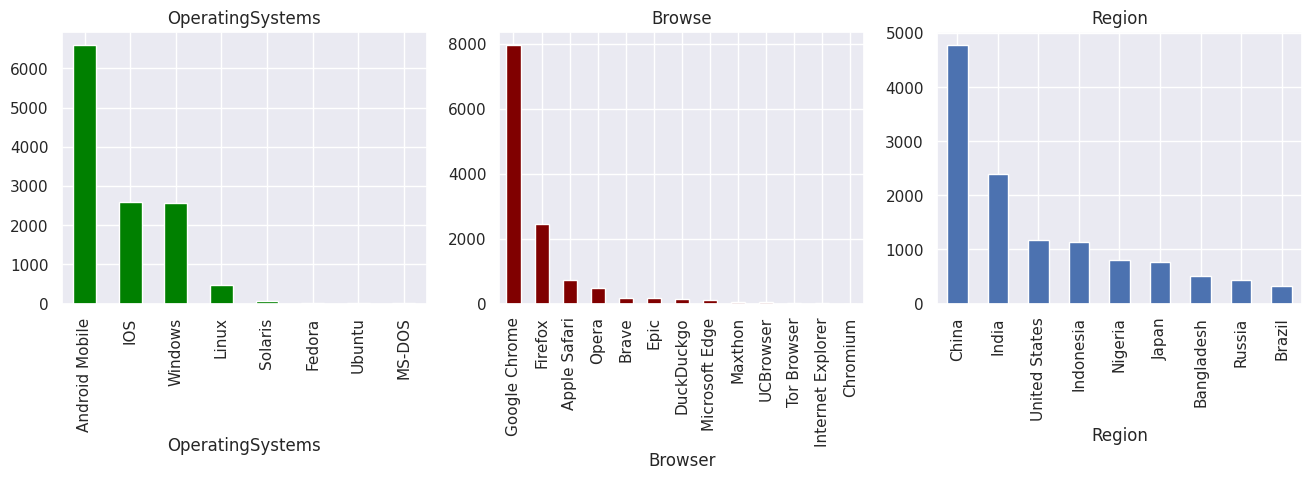

In [37]:
# Independed variable [caterogical]
plt.figure(1)
plt.subplot(331)
df['OperatingSystems'].value_counts().plot.bar(figsize=(16,12), title= 'OperatingSystems', color='green')

plt.subplot(332)
df['Browser'].value_counts().plot.bar(title= 'Browse', color='maroon')

plt.subplot(333)
df['Region'].value_counts().plot.bar(title= 'Region')

plt.show()



    

*   Best Operating System for website is Android Mobile, IOS and Windows. Almost 95% of World Population is using this 3 operating system which is good for website.
*   Google Chrome is used by most the people to access website.
*   China and India have half of the world population. but we have to work for russia and brazil.





    
    



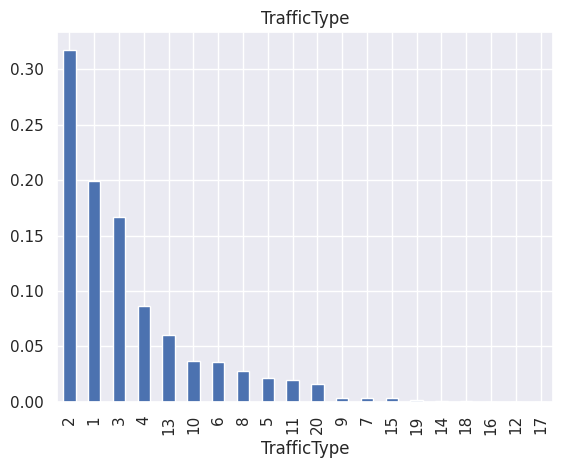

In [38]:
df['TrafficType'].value_counts(normalize=True).plot.bar(title= 'TrafficType')
plt.show()

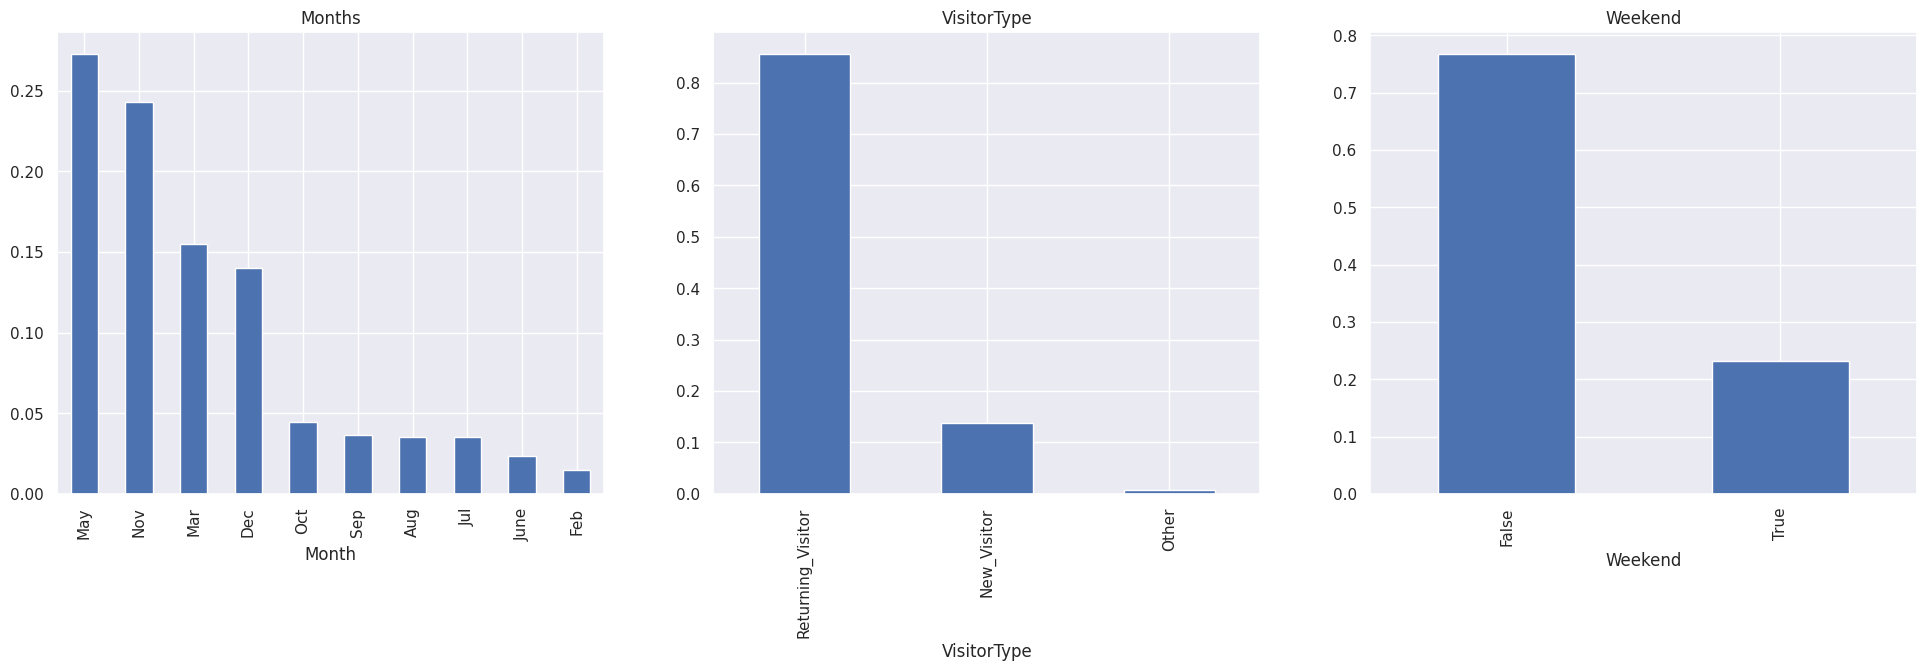

In [39]:
# Independed variable [ordinal]
plt.figure(1)
plt.subplot(131)
df['Month'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Months')

plt.subplot(132)
df['VisitorType'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'VisitorType')

plt.subplot(133)
df['Weekend'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Weekend')

plt.show()

From the above plots we can get some information about the data sets regarding the featurs.


*  May and Nov months have more visitor compare to the other months.

*     On website people visit more and more so dataset contain more returning visitor

*   people visit the website mostly in the week days.



#Plot the relation between the vistor type and a particular month

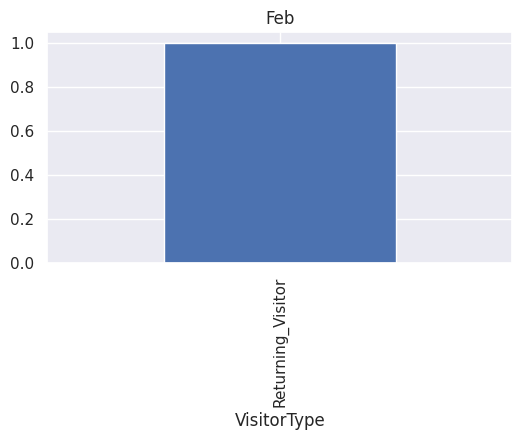

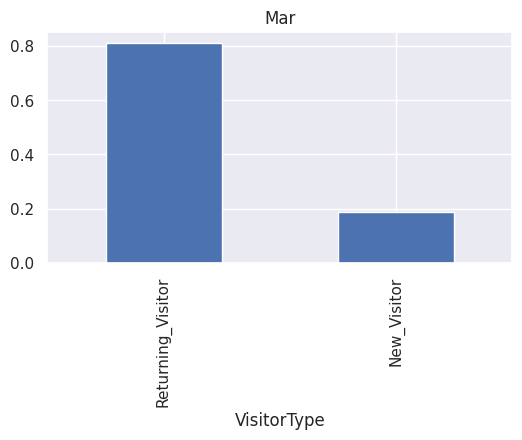

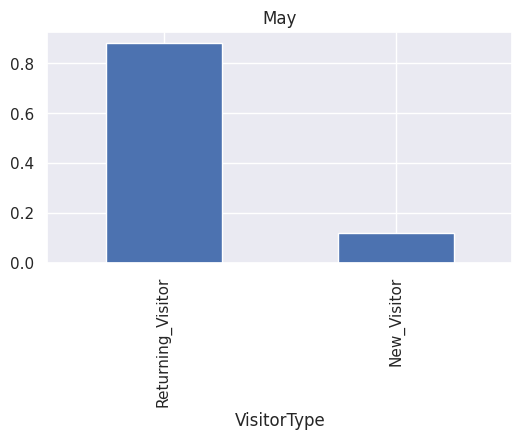

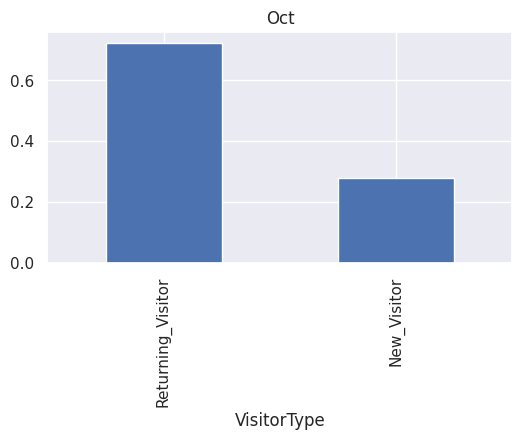

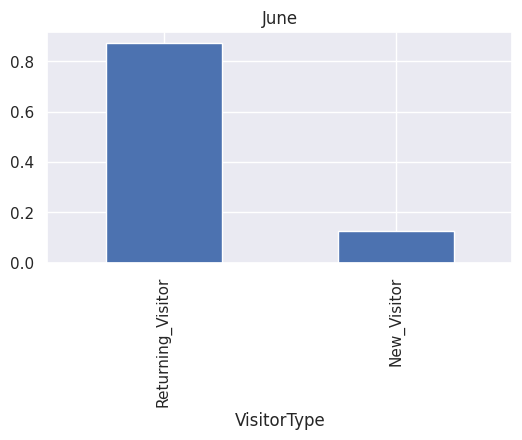

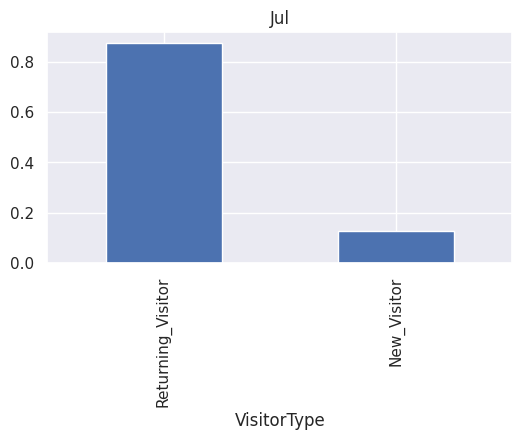

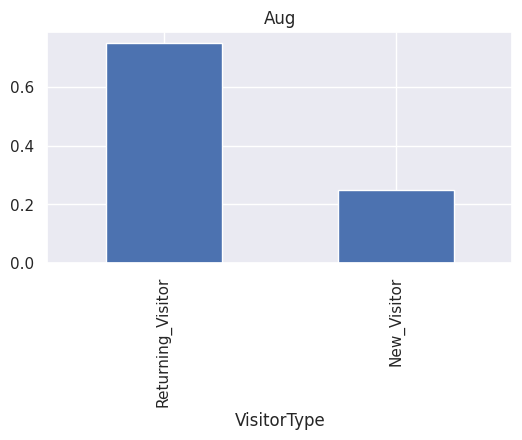

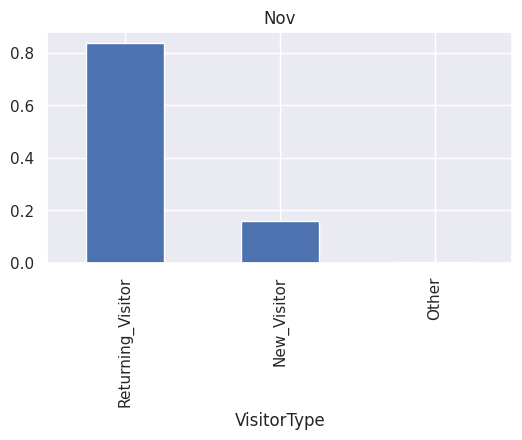

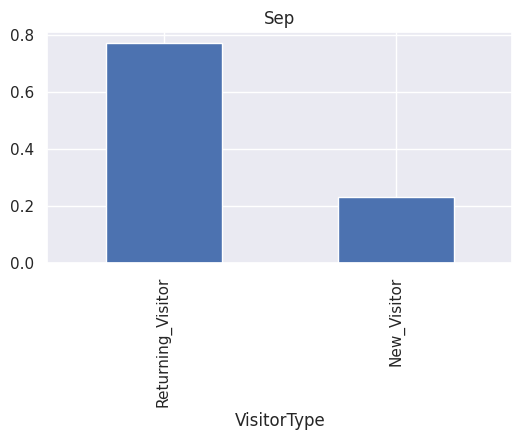

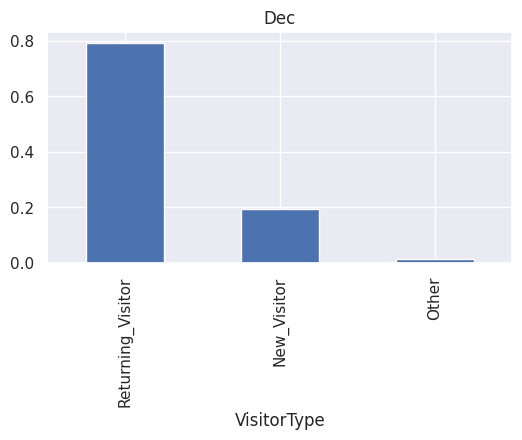

In [40]:
for col in df['Month'].unique():
    month = df['Month'] == col
    week = df['Weekend'] == True
    a = month & week
    b = df.loc[a]
    plt.figure(222)
    b['VisitorType'].value_counts(normalize=True).plot.bar(figsize=(6,3), title= col)
    plt.show()

#plot the graph to show the relation between adminsitrative duration and revenue

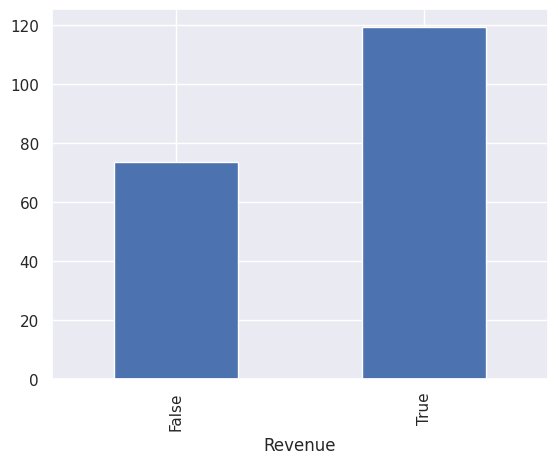

In [41]:
df.groupby('Revenue')['Administrative_Duration'].mean().plot.bar()
plt.show()

#plot the bar graph to show the relation between features and revenue

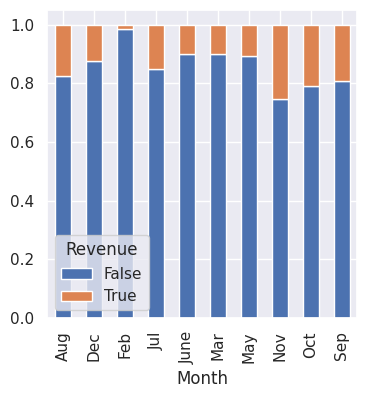

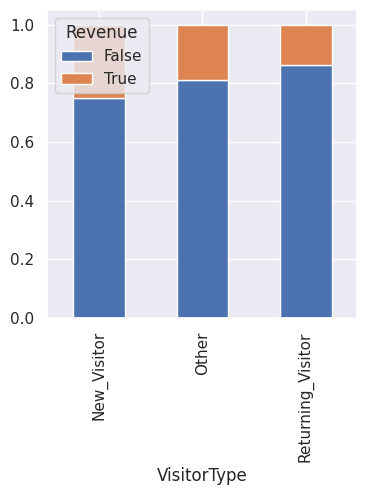

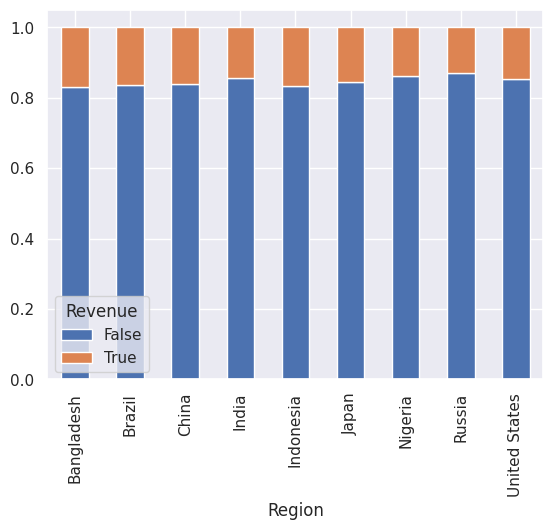

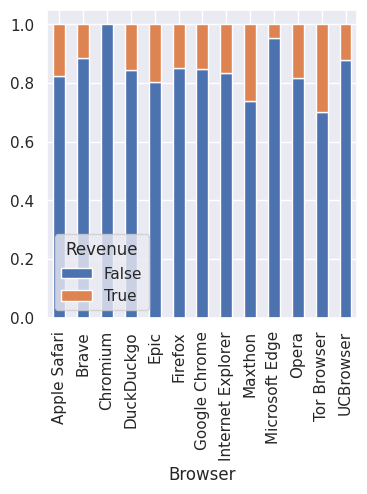

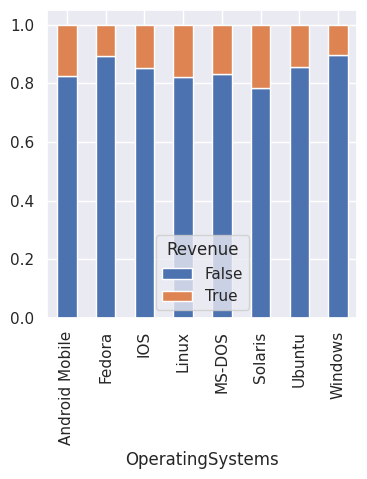

In [42]:
revenue=pd.crosstab(df['Month'],df['Revenue'])
visitortype=pd.crosstab(df['VisitorType'],df['Revenue'])
region=pd.crosstab(df['Region'],df['Revenue'])
browser=pd.crosstab(df['Browser'],df['Revenue'])
operatingsys=pd.crosstab(df['OperatingSystems'],df['Revenue'])

revenue.div(revenue.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
visitortype.div(visitortype.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
browser.div(browser.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
operatingsys.div(operatingsys.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

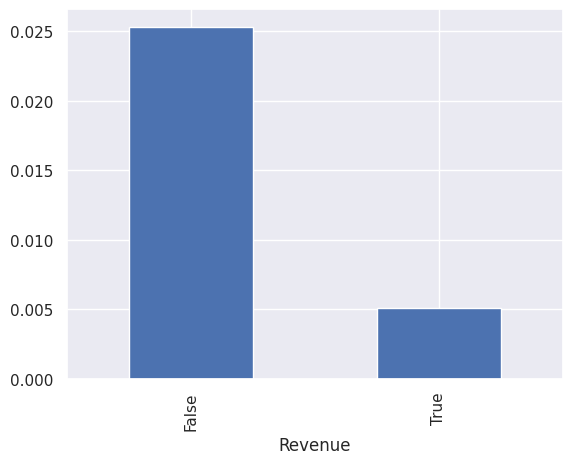

In [43]:
df.groupby('Revenue')['BounceRates'].mean().plot.bar()
plt.show()

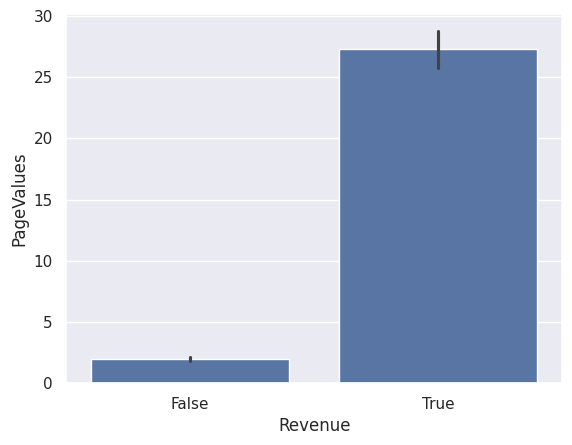

In [44]:
sns.barplot(x='Revenue', y='PageValues', data=df)
plt.show()

Page Value is an important feature in this dataset. It contain most of the true values. Increase in page value, increase in transcation.